In [44]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [45]:
iris=load_iris()

In [46]:
#Loading into dataframe
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [47]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
#append target and name it label
df['label']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [49]:
#use string label instaed
df['label']=df.label.replace(dict(enumerate(iris.target_names)))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
#Preparing data for keras and tensorflow

In [51]:
#label one hot encoding
label=pd.get_dummies(df['label'])
label.columns=['label_' +str(x)for x in label.columns]
df=pd.concat([df,label],axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0



drop the label columns
```
# This is formatted as code
```



In [52]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [53]:
#Creating x and y
X=df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
#converting dataframe into np array
X=np.asarray(X)

y=df[['label_setosa','label_versicolor','label_virginica',]]
#covert dataframe into nparray
y=np.asarray(y)

In [54]:
print(X[:10])
print(y[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [55]:
#splitting the data in training(75%)remaining(25%)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [56]:
#Sequential Model

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [58]:
model=Sequential([
              Dense(5,activation='relu',input_shape=(4,)),
              Dense(10,activation='relu'),
              Dense(3,activation='softmax'),
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 33        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


In [59]:
#adding layer via add method
model_seq=Sequential()
model_seq.add(Dense(5,activation='relu',input_shape=(4,)))
model_seq.add(Dense(10,activation='relu'))
model_seq.add(Dense(3,activation='softmax'))
model_seq.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_10 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 33        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


In [60]:
model_seq.compile(
    #optimizer rnsprop
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [61]:
history=model_seq.fit(X_train,y_train,
                      batch_size=64,
                      epochs=30,
                      validation_split=0.2)

Epoch 1/30
2/2 [==============================] - 1s 215ms/step - loss: 2.2246 - accuracy: 0.3258 - val_loss: 1.9276 - val_accuracy: 0.3043
Epoch 2/30
2/2 [==============================] - 0s 22ms/step - loss: 2.1754 - accuracy: 0.3258 - val_loss: 1.8829 - val_accuracy: 0.3043
Epoch 3/30
2/2 [==============================] - 0s 26ms/step - loss: 2.1265 - accuracy: 0.3258 - val_loss: 1.8392 - val_accuracy: 0.3043
Epoch 4/30
2/2 [==============================] - 0s 28ms/step - loss: 2.0808 - accuracy: 0.3258 - val_loss: 1.7966 - val_accuracy: 0.3043
Epoch 5/30
2/2 [==============================] - 0s 23ms/step - loss: 2.0320 - accuracy: 0.3258 - val_loss: 1.7552 - val_accuracy: 0.3043
Epoch 6/30
2/2 [==============================] - 0s 24ms/step - loss: 1.9860 - accuracy: 0.3258 - val_loss: 1.7146 - val_accuracy: 0.3043
Epoch 7/30
2/2 [==============================] - 0s 23ms/step - loss: 1.9409 - accuracy: 0.3258 - val_loss: 1.6747 - val_accuracy: 0.3043
Epoch 8/30
2/2 [==========

In [62]:
def plot_metric(history,metrics):
  train_metrics=history.history[metrics]
  val_metrics=history.history['val_'+metrics]
  epochs=range(1,len(train_metrics)+1)
  plt.plot(epochs,train_metrics,'bo--')
  plt.plot(epochs,val_metrics,'ro--')
  plt.title('Training and validation'+metrics)
  plt.xlabel('Epochs')
  plt.ylabel(metrics)
  plt.legend(['train_'+metrics,'val_'+metrics])
  plt.show()


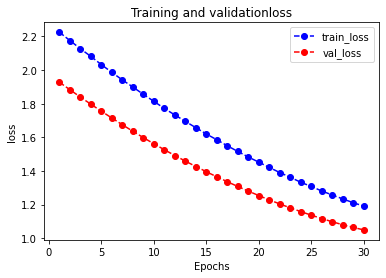

In [65]:
plot_metric(history,'loss')

In [66]:
history.history

{'accuracy': [0.3258427083492279,
  0.3258427083492279,
  0.3258427083492279,
  0.3258427083492279,
  0.3258427083492279,
  0.3258427083492279,
  0.3258427083492279,
  0.3258427083492279,
  0.3258427083492279,
  0.3258427083492279,
  0.3258427083492279,
  0.3258427083492279,
  0.3258427083492279,
  0.3258427083492279,
  0.3258427083492279,
  0.3258427083492279,
  0.3258427083492279,
  0.3258427083492279,
  0.3258427083492279,
  0.3258427083492279,
  0.3258427083492279,
  0.3258427083492279,
  0.3258427083492279,
  0.3258427083492279,
  0.3258427083492279,
  0.3258427083492279,
  0.3258427083492279,
  0.3258427083492279,
  0.3258427083492279,
  0.3258427083492279],
 'loss': [2.224649667739868,
  2.1753554344177246,
  2.1265151500701904,
  2.0807886123657227,
  2.031951904296875,
  1.9859826564788818,
  1.9409304857254028,
  1.8989394903182983,
  1.8554078340530396,
  1.8139381408691406,
  1.7715623378753662,
  1.7328797578811646,
  1.694800615310669,
  1.6571729183197021,
  1.6196374893

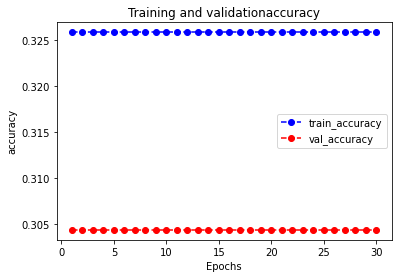

In [68]:
plot_metric(history,'accuracy')

In [69]:
model_seq.evaluate(x=X_test,y=y_test)

2/2 [==============================] - 0s 8ms/step - loss: 1.0703 - accuracy: 0.3684


[1.0702803134918213, 0.3684210479259491]